### Imports

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from utils import add_Loss, clean_data, plot_on_map

## Import and clean data 

In [3]:
#Select the dataset of one season of one year
YEAR = 2019
SEASON = "Rabi" # or "Kharif" 

#Path to the dataset
pathData = f"Data/RawDataUnified/RawData_{YEAR}_{SEASON}"
print(pathData)


df = pd.read_csv(pathData)
#df

Data/RawDataUnified/RawData_2019_Rabi


/Users/adrien/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#Clean an add loss to data
df=add_Loss(clean_data(df))
#df

## UMAP embeding

In [5]:
import umap
from sklearn.preprocessing import PowerTransformer
import warnings
warnings.filterwarnings("ignore")

df_with_key=df.copy()
#df = df.drop(columns = ["key"])

# #Preprocessing numerical
numerical = df.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = df.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(df.select_dtypes(include='object').columns) / df.shape[1]

## K-means (for mixed data)

In [6]:
from sklearn.cluster import KMeans
full_data=df.copy(deep=True)
#full_data

In [7]:
#One-Hot-Encoding
data = pd.get_dummies(full_data)

#Pre-processing
for c in data.columns:
    pt = PowerTransformer()
    data.loc[:, c] = pt.fit_transform(np.array(data[c]).reshape(-1, 1))

data

,Area Sown (Ha),Area Insured (Ha),SI Per Ha (Inr/Ha),Sum Insured (Inr),Indemnity Level,2002 Yield,2003 Yield,2004 Yield,2005 Yield,2006 Yield,...,Crop_Sunflower IRR,Crop_Sunflower Un-IRR,Crop_Taramira,Crop_Til (Sesame),Crop_Tomato,Crop_Urad,Crop_Urad Un-IRR,Crop_Wheat,Crop_Wheat IRR,Crop_Wheat Un-IRR
key,,,,,,,,,,,,,,,,,,,,,
andhra pradesh_anantapur_vidapanakal___,0.247994,1.269655,-0.807542,0.226452,-0.319852,0.044697,0.512999,0.541264,0.627332,-1.957289,...,-0.033172,-0.033832,-0.038911,-0.0271,-0.009391,-0.039033,-0.006399,-0.496067,-0.257296,-0.104627
andhra pradesh_anantapur_vajrakarur___,0.247994,1.269655,-0.807542,0.226452,-0.319852,0.044697,0.512999,0.541264,0.627332,-1.957289,...,-0.033172,-0.033832,-0.038911,-0.0271,-0.009391,-0.039033,-0.006399,-0.496067,-0.257296,-0.104627
andhra pradesh_anantapur_gooty___,0.247994,1.269655,-0.807542,0.226452,-0.319852,0.044697,0.512999,0.541264,0.627332,-1.957289,...,-0.033172,-0.033832,-0.038911,-0.0271,-0.009391,-0.039033,-0.006399,-0.496067,-0.257296,-0.104627
andhra pradesh_anantapur_guntakal___,0.247994,1.269655,-0.807542,0.226452,-0.319852,0.044697,0.512999,0.541264,0.627332,-1.957289,...,-0.033172,-0.033832,-0.038911,-0.0271,-0.009391,-0.039033,-0.006399,-0.496067,-0.257296,-0.104627
andhra pradesh_anantapur_pamidi___,0.247994,1.269655,-0.807542,0.226452,-0.319852,0.044697,0.512999,0.541264,0.627332,-1.957289,...,-0.033172,-0.033832,-0.038911,-0.0271,-0.009391,-0.039033,-0.006399,-0.496067,-0.257296,-0.104627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
west bengal_howrah_uluberia-ii___,0.247994,-1.170010,0.541619,-2.912778,1.591259,0.044697,0.512999,0.541264,-0.389940,-0.299055,...,-0.033172,-0.033832,-0.038911,-0.0271,-0.009391,-0.039033,-0.006399,2.015858,-0.257296,-0.104627
west bengal_purba medinipur_haldia___,0.247994,-0.928460,-0.290114,-2.723403,1.591259,0.044697,0.512999,0.541264,-0.075764,0.131881,...,-0.033172,-0.033832,-0.038911,-0.0271,-0.009391,-0.039033,-0.006399,2.015858,-0.257296,-0.104627
west bengal_purba medinipur_mohisadal-ii___,0.247994,-0.928460,-0.290114,-2.723403,1.591259,0.044697,0.512999,0.541264,-0.075764,0.131881,...,-0.033172,-0.033832,-0.038911,-0.0271,-0.009391,-0.039033,-0.006399,2.015858,-0.257296,-0.104627


In [8]:
#Actual Clustering
kmeans = KMeans(n_clusters=14).fit(data)
kmeans_labels = kmeans.labels_

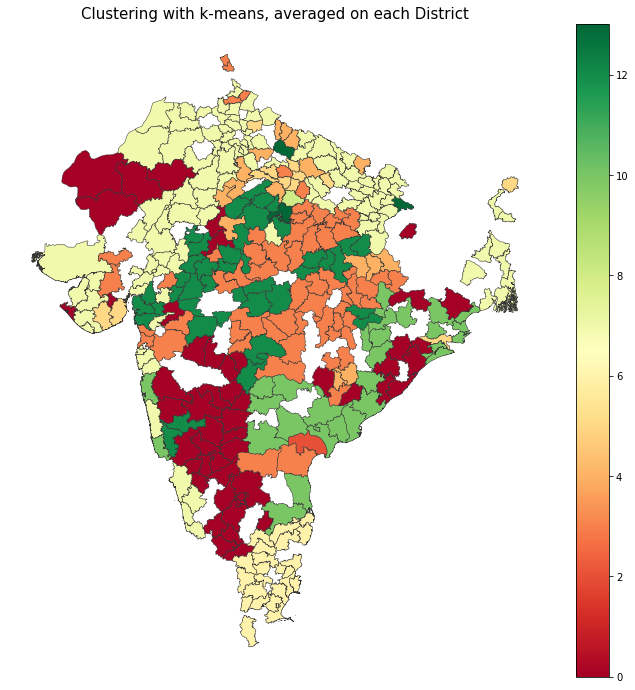

In [9]:
plot_on_map(kmeans_labels, pathData, 'District')

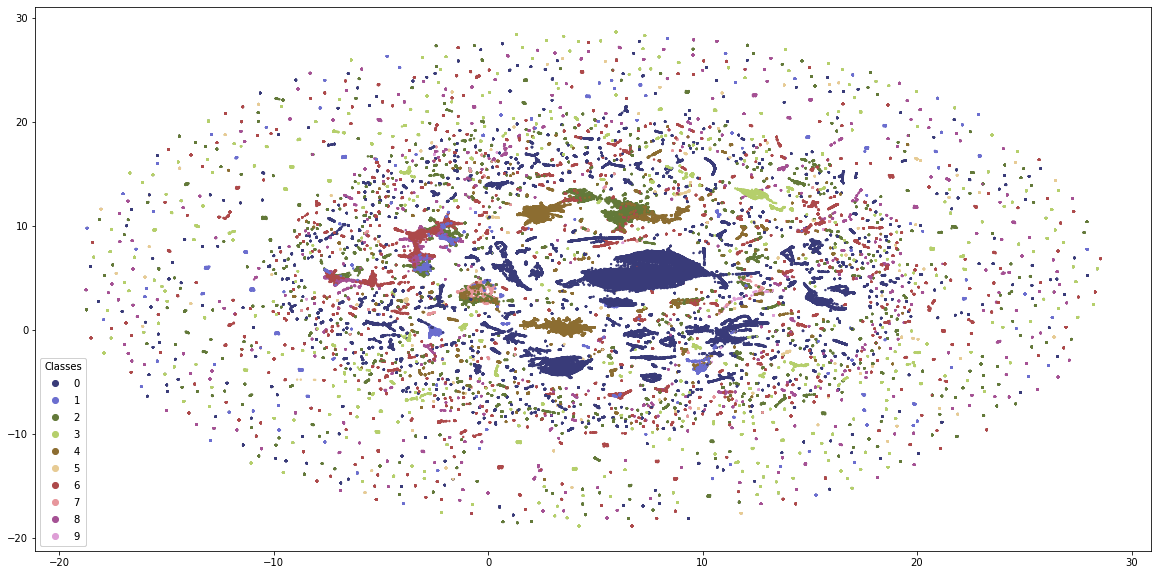

In [34]:
# embedding=embedding[0] #because tuple #comment if load embedding
embedding = np.load("Outputs/embedding_Rabi.npy")

fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=kmeans_labels, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=10),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

## Implémentation critère cluster

2.1171544533934035
2.043593446117891
2.2951566733481417
1.8876108125150748
2.0025663314017264
1.8847462609441614
2.2520353732683493
2.0752898646620435
2.5163502358783276
1.6490062345337468


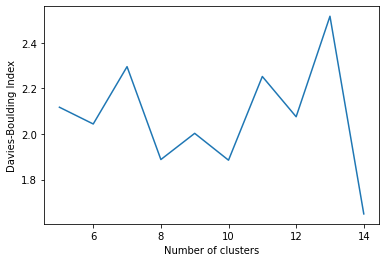

In [ ]:
from sklearn.metrics import davies_bouldin_score


results = {}

for i in range(5,15):
    kmeans = KMeans(n_clusters=i, random_state=30).fit(data)
    labels = kmeans.labels_
    db_index = davies_bouldin_score(data, labels)
    print(db_index)
    results.update({i: db_index})


plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

## Implémentation d'un DBSCAN


In [42]:
from sklearn.cluster import DBSCAN

Text(0, 0.5, 'Distance')

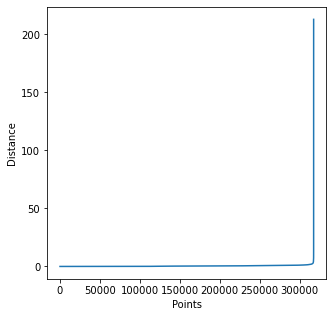

In [45]:
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(data)

distances, indices = neighbors.kneighbors(data)
distances = np.sort(distances[:,10], axis=0)

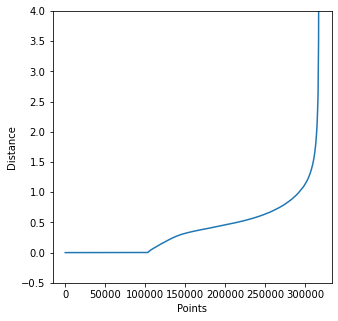

In [48]:
fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")
plt.ylim(-0.5,4)
plt.show()

Elbow method : optimal $\epsilon$ is $\epsilon = 1.1$
Minimum points : dimension of dataset : 80

In [49]:
dbscan_cluster = DBSCAN(eps=1.1, min_samples=80)
dbscan_cluster.fit(data)

DBSCAN(eps=1.1, min_samples=80)

In [50]:
# Number of Clusters
labels=dbscan_cluster.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 147
Estimated no. of noise points: 42001


In [51]:
dbscan_cluster2 = DBSCAN(eps=1.1, min_samples=150)
dbscan_cluster2.fit(data)

DBSCAN(eps=1.1, min_samples=150)

In [54]:
# Number of Clusters
dbscan_labels=dbscan_cluster2.labels_
N_clus=len(set(dbscan_labels))-(1 if -1 in dbscan_labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

# Identify Noise
n_noise = list(dbscan_cluster2.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

Estimated no. of clusters: 109
Estimated no. of noise points: 57213


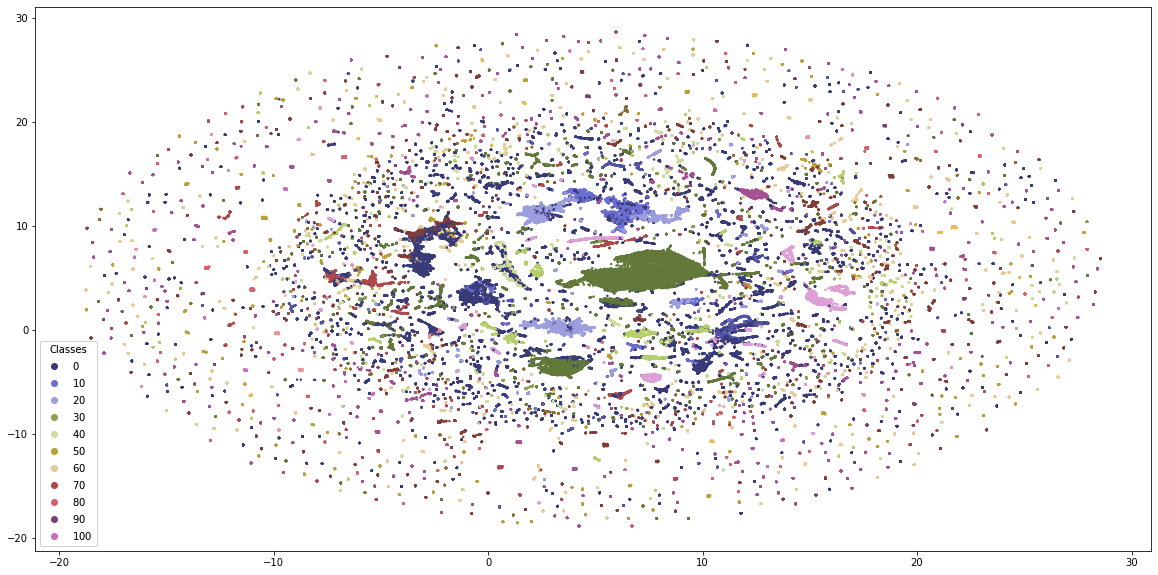

In [55]:
embedding = np.load("Outputs/embedding_Rabi.npy")

fig, ax = plt.subplots()
fig.set_size_inches((20, 10))
scatter = ax.scatter(embedding[:, 0], embedding[:, 1], s=2, c=dbscan_labels, cmap='tab20b', alpha=1.0)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(num=10),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

Davies-Bouldin score

In [56]:
from sklearn.metrics import davies_bouldin_score

db_index = davies_bouldin_score(data, dbscan_labels)
print(db_index)


1.987845079805472


In [57]:
results = {}
results.update({150: db_index})
minPts = [200,250,300, 350]

for m in minPts :
    print('min samples in cluster: %d' % m)
    dbscan_cluster3 = DBSCAN(eps=1.1, min_samples=m)
    dbscan_cluster3.fit(data)

    # Number of Clusters
    dbscan_labels3=dbscan_cluster3.labels_
    N_clus3=len(set(dbscan_labels3))-(1 if -1 in dbscan_labels3 else 0)
    print('Estimated no. of clusters: %d' % N_clus3)

    # Identify Noise
    n_noise3 = list(dbscan_cluster3.labels_).count(-1)
    print('Estimated no. of noise points: %d' % n_noise3)

    # score
    db_index = davies_bouldin_score(data, dbscan_labels3)
    print(f'score: {db_index}')
    results.update({m: db_index})

min samples in cluster: 200
Estimated no. of clusters: 101
Estimated no. of noise points: 65861
score: 1
min samples in cluster: 250
Estimated no. of clusters: 96
Estimated no. of noise points: 72460
score: 1
min samples in cluster: 300
Estimated no. of clusters: 84
Estimated no. of noise points: 81350
score: 1
min samples in cluster: 350
Estimated no. of clusters: 76
Estimated no. of noise points: 91636
score: 1


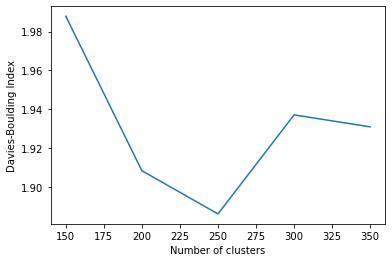

In [58]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Min number in clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

Pour $\epsilon = 1.1$, le nombre minimal de points optimal est 250 si on le garde petit mais on obtient alors 96 clusters et 72000 points de bruit.

In [59]:
results = {}
minPts = [150,300, 500, 800, 1200, 2000]

for m in minPts :
    print('min samples in cluster: %d' % m)
    dbscan_cluster3 = DBSCAN(eps=1.5, min_samples=m)
    dbscan_cluster3.fit(data)

    # Number of Clusters
    dbscan_labels3=dbscan_cluster3.labels_
    N_clus3=len(set(dbscan_labels3))-(1 if -1 in dbscan_labels3 else 0)
    print('Estimated no. of clusters: %d' % N_clus3)

    # Identify Noise
    n_noise3 = list(dbscan_cluster3.labels_).count(-1)
    print('Estimated no. of noise points: %d' % n_noise3)

    # score
    db_index = davies_bouldin_score(data, dbscan_labels3)
    print(f'score: {db_index}')
    results.update({m: db_index})

min samples in cluster: 150
Estimated no. of clusters: 85
Estimated no. of noise points: 27462
score: 2.431789417590783
min samples in cluster: 300
Estimated no. of clusters: 70
Estimated no. of noise points: 40336
score: 2.3196690950951777
min samples in cluster: 500
Estimated no. of clusters: 54
Estimated no. of noise points: 57942
score: 2.152718269262632
min samples in cluster: 800
Estimated no. of clusters: 38
Estimated no. of noise points: 80674
score: 2.1256845876481285
min samples in cluster: 1200
Estimated no. of clusters: 28
Estimated no. of noise points: 100529
score: 2.114292266218514
min samples in cluster: 2000
Estimated no. of clusters: 19
Estimated no. of noise points: 127943
score: 2.02402251026025


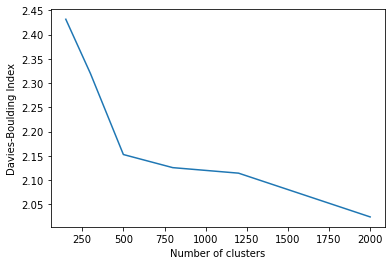

In [60]:
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Davies-Boulding Index")
plt.show()

Si on augmente $\epsilon$, il vaut mieux prendre un nombre min de points très grands. On obtient moins de clusters mais le critère de Davis-Boulding est moins bon

In [150]:
results = {}
minPts = [250,500,800,1200,2000]

for m in minPts :
    print('min samples in cluster: %d' % m)
    dbscan_cluster3 = DBSCAN(eps=1.1, min_samples=m)
    dbscan_cluster3.fit(data)

    # Number of Clusters
    dbscan_labels3=dbscan_cluster3.labels_
    N_clus3=len(set(dbscan_labels3))-(1 if -1 in dbscan_labels3 else 0)
    print('Estimated no. of clusters: %d' % N_clus3)

    # Identify Noise
    n_noise3 = list(dbscan_cluster3.labels_).count(-1)
    print('Estimated no. of noise points: %d' % n_noise3)

    # score
    db_index = davies_bouldin_score(data, dbscan_labels3)
    print(f'score: {db_index}')


min samples in cluster: 250
Estimated no. of clusters: 96
Estimated no. of noise points: 72460
score: 1.8863177673430789
min samples in cluster: 500
Estimated no. of clusters: 55
Estimated no. of noise points: 107836
score: 1.880566504733115
min samples in cluster: 800
Estimated no. of clusters: 35
Estimated no. of noise points: 129757
score: 1.8501520175427193
min samples in cluster: 1200
Estimated no. of clusters: 26
Estimated no. of noise points: 147466
score: 1.814689676302524
min samples in cluster: 2000
Estimated no. of clusters: 15
Estimated no. of noise points: 179051
score: 1.928240423234874


Best choice : min_samples = 1200 for $\epsilon = 1.1$ (which is best choice according to elbow method)

In [153]:
print('min samples in cluster: %d' % 1200)
dbscan_cluster = DBSCAN(eps=1.1, min_samples=1200)
dbscan_cluster.fit(data)

# Number of Clusters
dbscan_labels=dbscan_cluster.labels_
N_clus=len(set(dbscan_labels))-(1 if -1 in dbscan_labels else 0)
print('Estimated no. of clusters: %d' % N_clus3)

# Identify Noise
n_noise = list(dbscan_cluster.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

# score
db_index = davies_bouldin_score(data, dbscan_labels)
print(f'score: {db_index}')

min samples in cluster: 1200
Estimated no. of clusters: 15
Estimated no. of noise points: 147466
score: 1.814689676302524


In [10]:
plot_on_map(dbscan_labels, pathData, 'District')

NameError: name 'dbscan_labels' is not defined